In [2]:
import matplotlib.pyplot as plt
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
cat4 = cv2.imread('../CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [3]:
type(cat4)

numpy.ndarray

In [4]:
cat4.shape

(375, 500, 3)

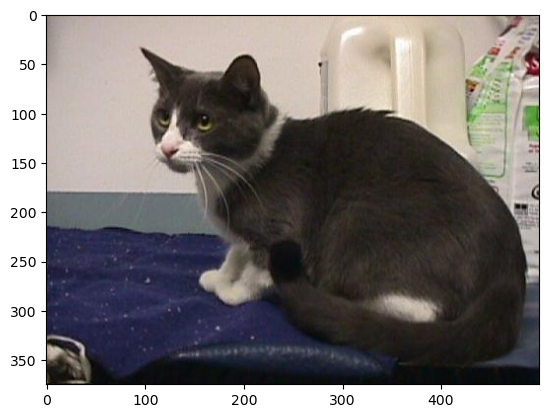

In [5]:
plt.imshow(cat4)

In [6]:
dog2 = cv2.imread('../CATS_DOGS/train/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [7]:
dog2.shape

(199, 188, 3)

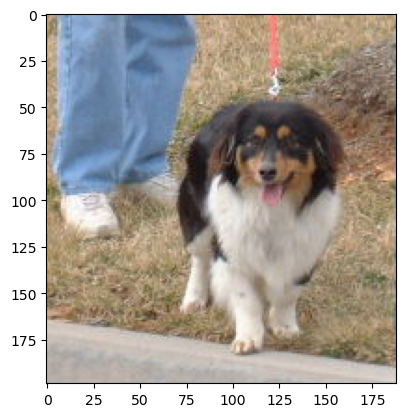

In [8]:
plt.imshow(dog2)

### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [16]:
# width,height,channels
image_shape = (150,150,3)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
import os
from keras.preprocessing import image
import numpy as np

# Load images and labels
def load_images(directory, target_size, num_samples):
    image_list = []
    label_list = []
    for class_label in os.listdir(directory):
        class_path = os.path.join(directory, class_label)
        for filename in os.listdir(class_path)[:num_samples]:
            img_path = os.path.join(class_path, filename)
            img = image.load_img(img_path, target_size=target_size)
            img_array = image.img_to_array(img)
            image_list.append(img_array)
            label_list.append(class_label.lower())  # Assuming the directory structure follows class labels
    return np.array(image_list), np.array(label_list)

In [30]:
# Set image directory and parameters
train_dir = '../CATS_DOGS/train'
test_dir = '../CATS_DOGS/test'
target_size = (150, 150)
num_train_samples = 1000
num_test_samples = 200

# Load images and labels for training and testing
train_images, train_labels = load_images(train_dir, target_size, num_train_samples)
test_images, test_labels = load_images(test_dir, target_size, num_test_samples)

In [32]:
len(test_images)

400

In [33]:
# Flatten image data
train_images_flat = train_images.reshape(len(train_images), -1)
test_images_flat = test_images.reshape(len(test_images), -1)

In [34]:
len(test_images)

400

In [35]:
len(train_labels)

2000

In [ ]:
# SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the SVM model
svm_model.fit(train_images_flat, train_labels)

# Make predictions on the test set
svm_predictions = svm_model.predict(test_images_flat)

# Evaluate accuracy
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print(f"SVM Model Accuracy: {svm_accuracy}")

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')



Predicted label: dog


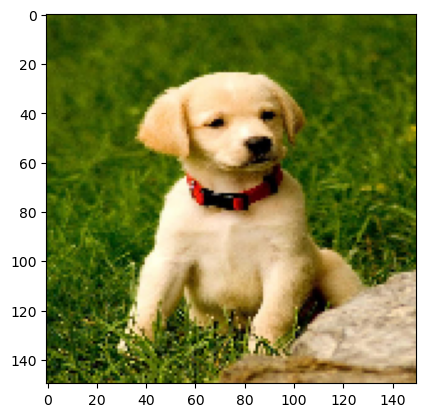

In [6]:
# Load the SVM model and make predictions on a new image
new_image_path = 'unnamed.jpg'  # Replace with the path to your new image
target_size = (150, 150)
new_img = image.load_img(new_image_path, target_size=target_size)
new_img_array = image.img_to_array(new_img)
new_img_flat = new_img_array.reshape(1, -1)
plt.imshow(new_img)
loaded_svm_model = joblib.load('svm_model.pkl')
svm_prediction_prob = loaded_svm_model.predict(new_img_flat)
print(f'Predicted label: {svm_prediction_prob[0]}')

Predicted label: cat


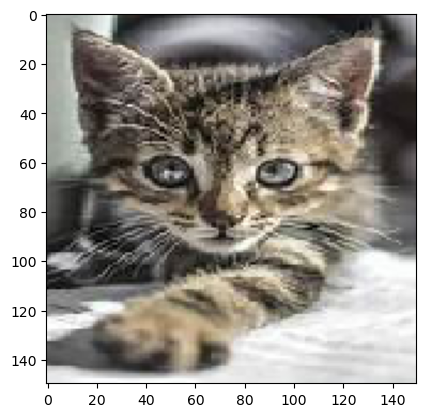

In [8]:
# Load the SVM model and make predictions on a new image
new_image_path = 'th.jpg'  # Replace with the path to your new image
target_size = (150, 150)
new_img = image.load_img(new_image_path, target_size=target_size)
new_img_array = image.img_to_array(new_img)
new_img_flat = new_img_array.reshape(1, -1)
plt.imshow(new_img)
#loaded_svm_model = joblib.load('svm_model.pkl')
svm_prediction_prob = loaded_svm_model.predict(new_img_flat)
print(f'Predicted label: {svm_prediction_prob[0]}')